In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/50_Startups.csv")

In [ ]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df = df.drop("Administration", axis =1)

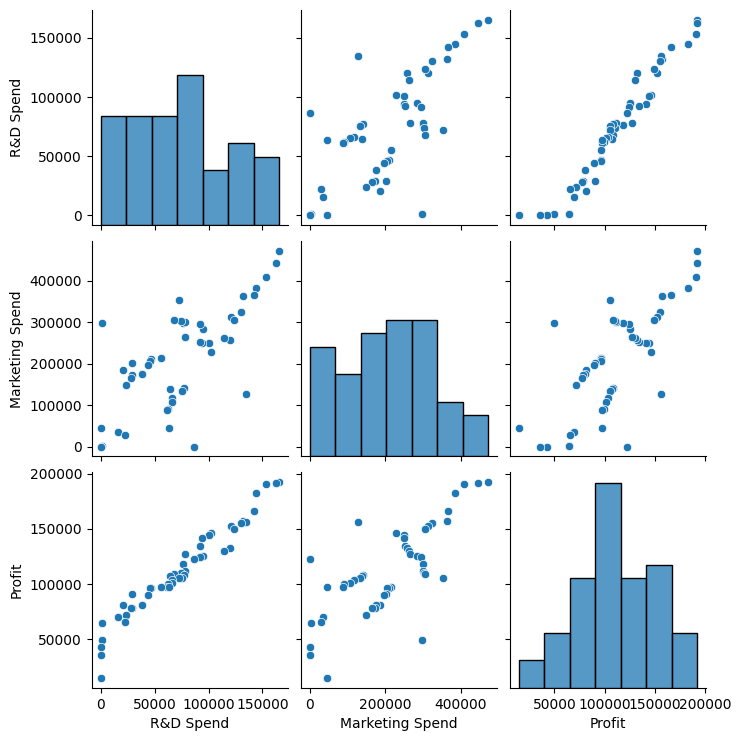

In [ ]:
sns.pairplot(data = df)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

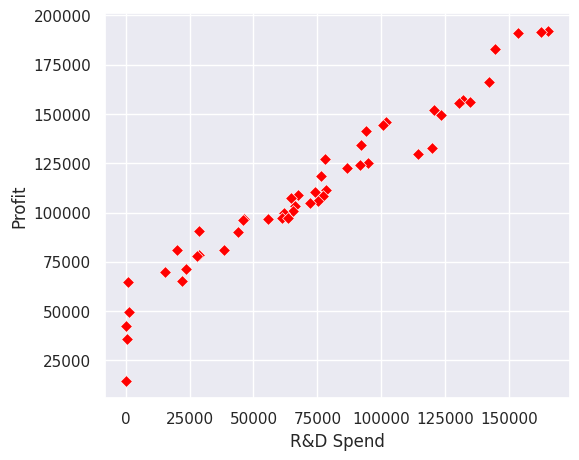

In [ ]:
sns.set_theme()
plt.figure(figsize = (6,5))
sns.scatterplot(x = "R&D Spend", y ="Profit", data = df, marker = "D", color = "Red")

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

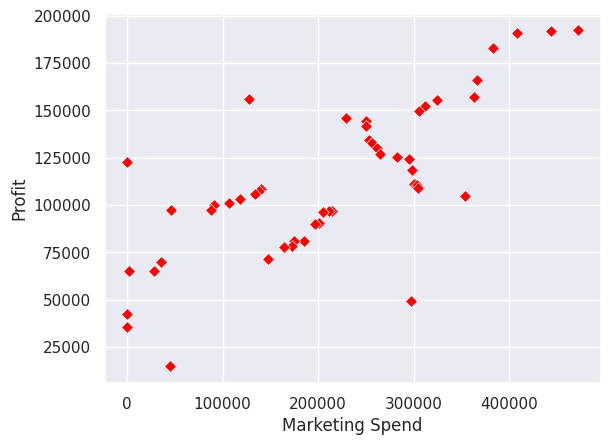

In [ ]:
sns.scatterplot(x = "Marketing Spend", y ="Profit", data = df, marker = "D", color = "Red")

<Axes: xlabel='Marketing Spend', ylabel='R&D Spend'>

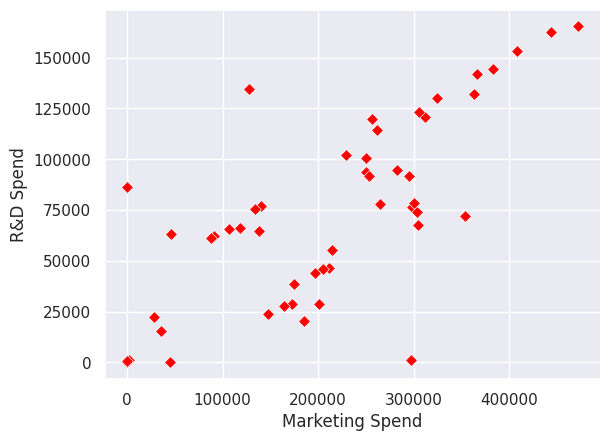

In [ ]:
sns.scatterplot(x = "Marketing Spend", y ="R&D Spend", data = df, marker = "D", color = "Red")

In [ ]:
df.drop("State", axis =1).corr()

,R&D Spend,Marketing Spend,Profit
R&D Spend,1.000000,0.724248,0.972900
Marketing Spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


In [ ]:
X = df[["R&D Spend","Marketing Spend"]]
y = df["Profit"]

<Axes: xlabel='R&D Spend', ylabel='Profit'>

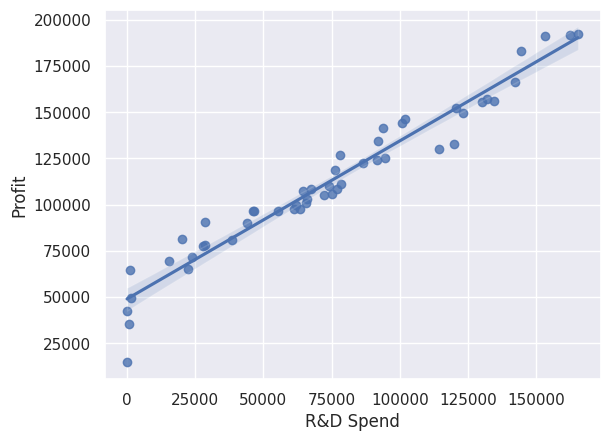

In [ ]:
sns.regplot(x = df["R&D Spend"],y = df["Profit"], data = df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

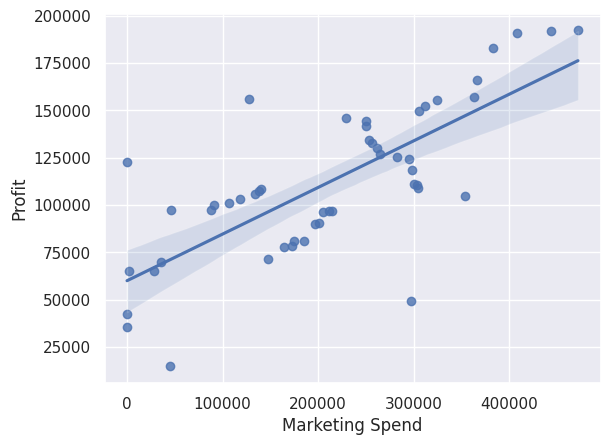

In [ ]:
sns.regplot(x = df["Marketing Spend"],y = df["Profit"], data = df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)

MSE :  84301156.26956448
MAE :  6996.096605229584
RMSE :  9181.56611202928


In [ ]:

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)


0.9049603822744297
